In [1]:
!python --version
!which python

import torch
print(torch.__version__)

Python 3.7.2
/home/fenli/anaconda3/envs/mask/bin/python
1.0.1.post2


In [3]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np

import requests
from io import BytesIO
from PIL import Image
from time import perf_counter

In [4]:
def load(url):
    response = requests.get(url)
    pil_image = Image.open(BytesIO(response.content)).convert("RGB")
    # convert to BGR format
    image = np.array(pil_image)[:, :, [2, 1, 0]]
    return image

def imshow(img):
    pylab.rcParams['figure.figsize'] = 20, 12
    plt.imshow(img[:, :, [2, 1, 0]])
    #plt.axis("off")

In [5]:
from maskrcnn_benchmark.config import cfg

config_file = "/home/fenli/my_code/maskrcnn-benchmark/configs/myexp.yaml"
cfg.merge_from_file(config_file)

GpuIdToUse = None
#GpuIdToUse = "1"

if GpuIdToUse is not None:
    import os
    os.environ['CUDA_VISIBLE_DEVICES'] = GpuIdToUse
    print ("using gpu")
    cfg.merge_from_list(["MODEL.DEVICE", "cuda"])
else:
    print ("using cpu")
    cfg.merge_from_list(["MODEL.DEVICE", "cpu"])

    
cfg.merge_from_list(["MODEL.WEIGHT", "/home/fenli/my_model/fashion_category_attr/model_FasterRCnn_R50FPN_iter80000.pth"])

using cpu


In [6]:
from mypredictor import MyDemo

my_demo = MyDemo(
    cfg,
    min_image_size=800,
    confidence_threshold=0.1,
)

load /home/fenli/my_model/fashion_category_attr/model_FasterRCnn_R50FPN_iter80000.pth


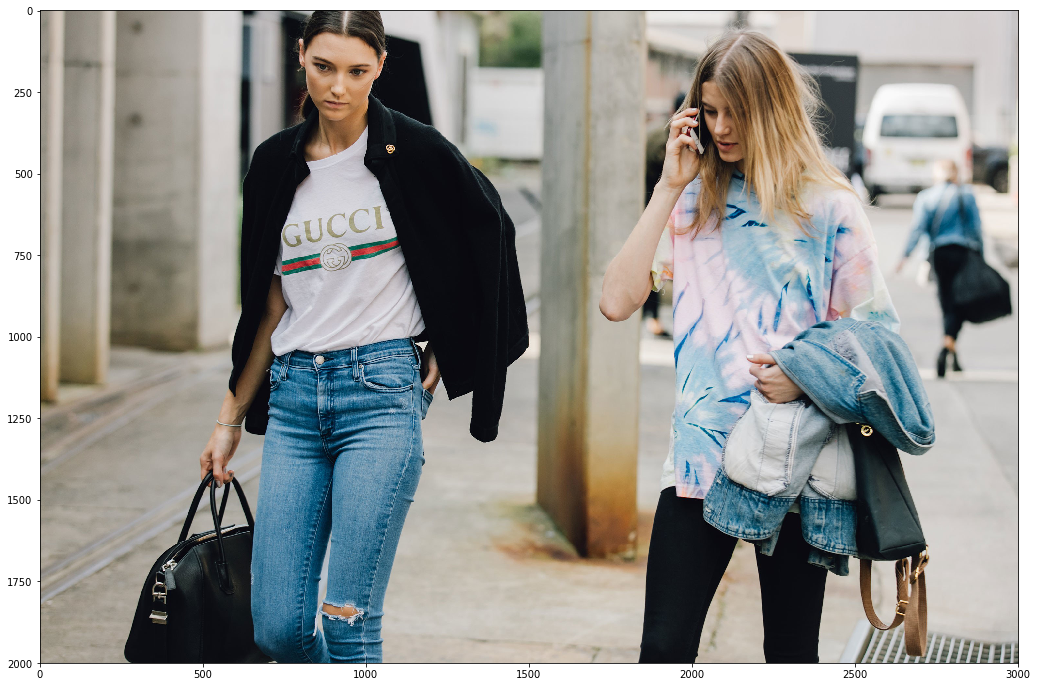

In [7]:
image = load(
#    "https://cdn.cliqueinc.com/cache/posts/245509/japanese-street-style-245509-1513874225144-image.700x0c.jpg"
#    "https://static01.nyt.com/images/2019/02/27/fashion/weddings/27doozy1/27doozy1-superJumbo-v2.jpg"
#    "https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/hbz-street-style-ss2019-nyfw-day4-12-1536604387.jpg"
    "https://assets.vogue.com/photos/591daa7caf3eb104a5ac3ac5/master/pass/15-sydney-resort-18-day-5.jpg"
#    "https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/milan-mfw-street-style-ss18-day-4-tyler-joe-023-1506598430.jpg"
)
imshow(image)

In [ ]:
start_time = perf_counter()
predictions = my_demo.run_on_opencv_image(image, 0.2)
elapsed_time = perf_counter() - start_time
print("Done in {:.0f} ms".format(elapsed_time*1000))
imshow(predictions)
